In [1]:
import numpy as np
import matplotlib.pyplot as plt
import serial
from scipy import signal
from scipy.signal import butter, filtfilt
import pandas as pd

In [2]:
ser = serial.Serial("COM3", 115200)
    
l = []
l_reposo = []
l_resultado = []

seg = 16
muestras = seg*500   #está muestreando a 500 muestras en un segundo

#tomar máximo y mínimo de un intervalo de tiempo y despues compara en base a eso lo que se mandará 

for i in range(muestras): 
    dato = ser.readline().decode('utf-8')#.strip()
    dato = float(dato)
    l.append(dato)
    if 1500>i:
        l_reposo.append(dato)
    d_min = min(l_reposo)
    d_max = max(l_reposo)

    lim_up = d_max + 100  #d_max*0.1
    #lim_down = d_min - d_min*0.1


    #Después de los 3 segundos
    if 1500 > i and dato > lim_up: #or lim_down > l2:
        l_resultado.append(1)
        ser.write(str(1).encode())
    elif 1500 > i and lim_up > dato:
        l_resultado.append(0)
        ser.write(str(0).encode())


len(l)

8000

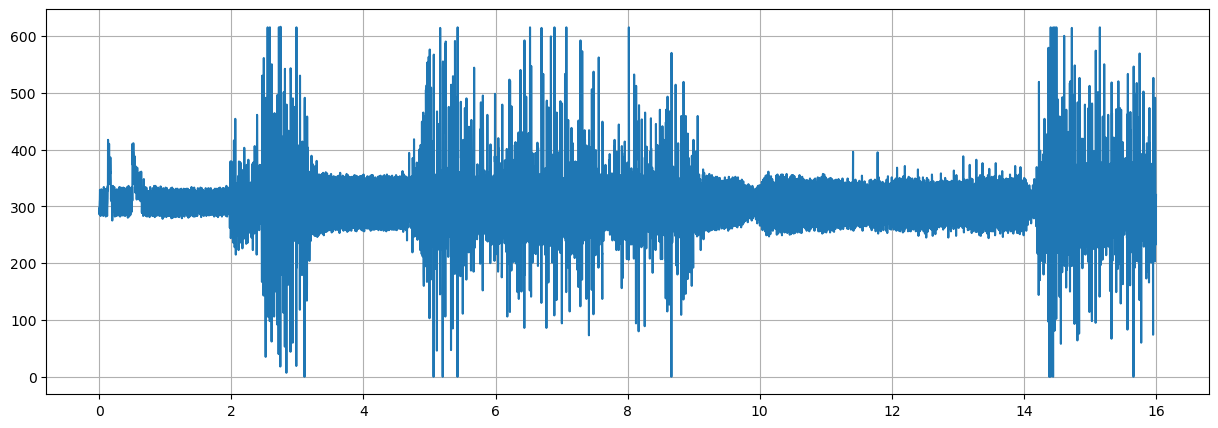

In [3]:
tiempo = np.arange(0, seg, 0.002)  #Desde cero hasta X segundos en un muestreo de  500 muestras por segundo  
#len(tiempo)

fm = 500 # 500[Hz] frecuencia de muestreo
T = 1/fm # Periodo del muestreo
largo_señal = len(l) # Largo de la señal 1
duracion_señal = T * largo_señal
tiempo_señal = np.arange(0, duracion_señal, T)

plt.figure(figsize = (15,5))

plt.subplot(111)
plt.plot(tiempo,l) # 
plt.grid(True)
